# Propriétés d'une population fictive de 130 personnes: analyse univariée qualitative

Version du 24 avril 2022

130 ou 900 individus, cinq caractères: age, personnes dans le même foyer, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Références bibliographiques

Référence:

* [Statistique descriptive unidimensionnelle](http://wikistat.fr/pdf/st-l-des-uni.pdf) (-> [Site Wikistat](http://wikistat.fr/))


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [3]:
### Lire le fichier corrigé manuellement – ne pas effacer !

# Alternative: 'data/observations_mod.csv'
path = 'data/observations_900.csv'

observations = pd.read_csv(path)
observations.set_index('id', inplace=True)
observations.head()

,age,n_foyer,lecture_journal,parti
id,,,,
1,87,7,deux-trois fois par semaine,populiste
2,31,4,de temps en temps,gauche
3,79,5,deux-trois fois par semaine,populiste
4,36,3,le week-end,écologiste
5,75,4,deux-trois fois par semaine,gauche


In [7]:
## Nombre de lignes et de colonnes du tableau
observations.shape

(900, 4)

In [4]:
### Nombre de lignes du tableau
obs = observations
len(obs)

900

## Regrouper et analyser les variables qualitatives

### Parti politique

In [9]:
### Regrouper et compter
gb_parti = obs.groupby('parti').size()
sgb_parti = gb_parti.sort_values(ascending = True)
sgb_parti

parti
centre        161
gauche        169
populiste     187
écologiste    190
droite        193
dtype: int64

In [13]:
### Modification du dataframe
df_partis = pd.DataFrame(sgb_parti, columns=['effectif'])
df_partis.reset_index(inplace=True)
df_partis

,parti,effectif
0,centre,161
1,gauche,169
2,populiste,187
3,écologiste,190
4,droite,193


In [14]:
### Le code attribué manuellement permet de représenter l'émicycle parlementaire lors du tri
# En revanche, noter que la valeur n'a pas de signification quantitative
df_partis['code_parti'] = [3,2,5,1,4]
df_partis

,parti,effectif,code_parti
0,centre,161,3
1,gauche,169,2
2,populiste,187,5
3,écologiste,190,1
4,droite,193,4


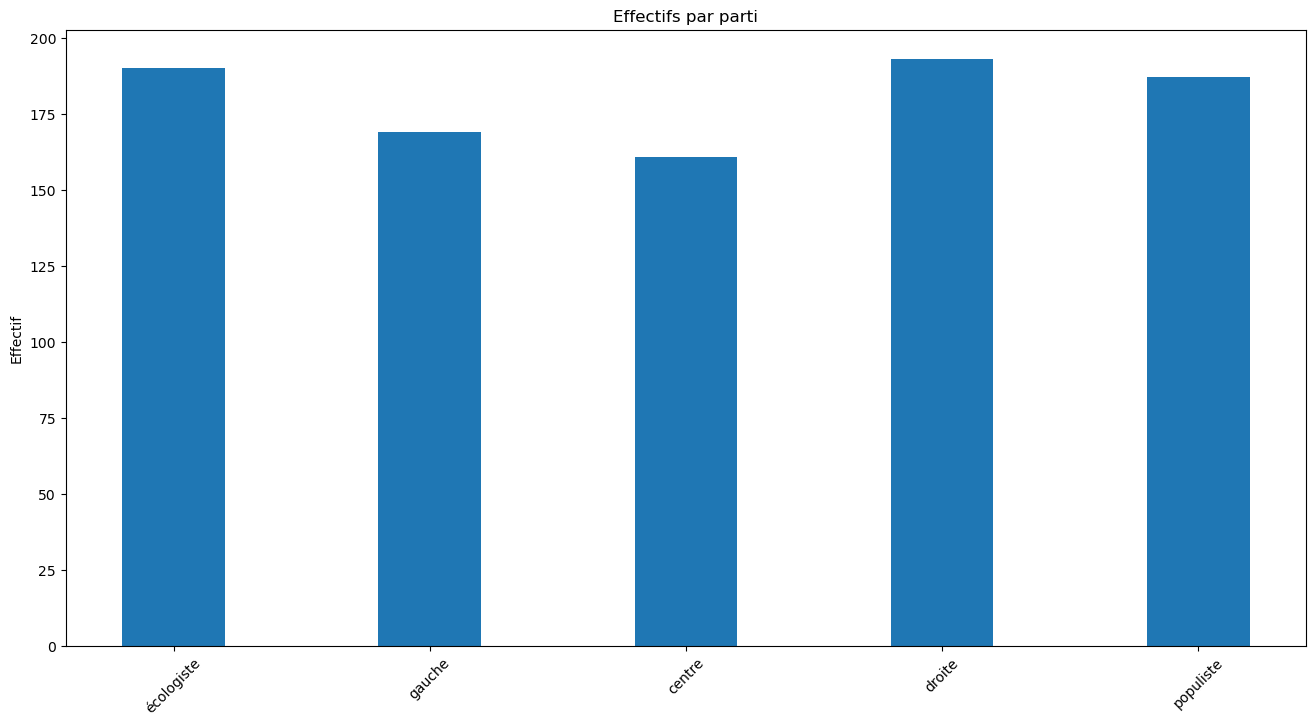

In [15]:
# Distribution par parti: représentation par diagramme à barres

objects = [l for l in df_partis['parti']]
eff = [l for l in df_partis['effectif']]

objects = [l for l in df_partis.sort_values('code_parti')['parti']]
eff = [l for l in df_partis.sort_values('code_parti')['effectif']]


p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par parti')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


### Fréquence de lecture d'un journal

In [59]:
### Regrouper et compter par fréquence de lecture du journal (variable qualitative)
gb_lecture_journal = obs.groupby('lecture_journal').size()
sgb_lecture_journal = gb_lecture_journal.sort_values(ascending = False)
sgb_lecture_journal

lecture_journal
tous les jours                 233
le week-end                    209
deux-trois fois par semaine    196
de temps en temps              137
très rarement                  125
dtype: int64

In [60]:
## Le code permet un tri dans l'ordre de la fréquence de cette variable 
#  qui en fait est une variable qualitative ordonnée
df_lecture_journal = pd.DataFrame(sgb_lecture_journal)
df_lecture_journal.reset_index(inplace=True)
df_lecture_journal.columns = ['lecture','effectif']
df_lecture_journal['code_lecture'] = [5,3,4,2,1]
df_lecture_journal

,lecture,effectif,code_lecture
0,tous les jours,233,5
1,le week-end,209,3
2,deux-trois fois par semaine,196,4
3,de temps en temps,137,2
4,très rarement,125,1


In [61]:
df_lecture_journal.sort_values('code_lecture', inplace=True)
list(df_lecture_journal['lecture'])

['très rarement',
 'de temps en temps',
 'le week-end',
 'deux-trois fois par semaine',
 'tous les jours']

In [62]:
df_lecture_journal['effectif_cumule'] = df_lecture_journal['effectif'].cumsum()
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule
4,très rarement,125,1,125
3,de temps en temps,137,2,262
1,le week-end,209,3,471
2,deux-trois fois par semaine,196,4,667
0,tous les jours,233,5,900


In [63]:
df_lecture_journal['frequence'] = (100 * df_lecture_journal['effectif'] \
                                   / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence
4,très rarement,125,1,125,13.89
3,de temps en temps,137,2,262,15.22
1,le week-end,209,3,471,23.22
2,deux-trois fois par semaine,196,4,667,21.78
0,tous les jours,233,5,900,25.89


In [64]:
### Fréquence cumulée calculée en utilisant les effectifs cumulés

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif_cumule'] \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
4,très rarement,125,1,125,13.89,13.89
3,de temps en temps,137,2,262,15.22,29.11
1,le week-end,209,3,471,23.22,52.33
2,deux-trois fois par semaine,196,4,667,21.78,74.11
0,tous les jours,233,5,900,25.89,100.00


In [65]:
### Fréquence cumulée calculée directement

# Cf. https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif'].cumsum() \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
4,très rarement,125,1,125,13.89,13.89
3,de temps en temps,137,2,262,15.22,29.11
1,le week-end,209,3,471,23.22,52.33
2,deux-trois fois par semaine,196,4,667,21.78,74.11
0,tous les jours,233,5,900,25.89,100.00


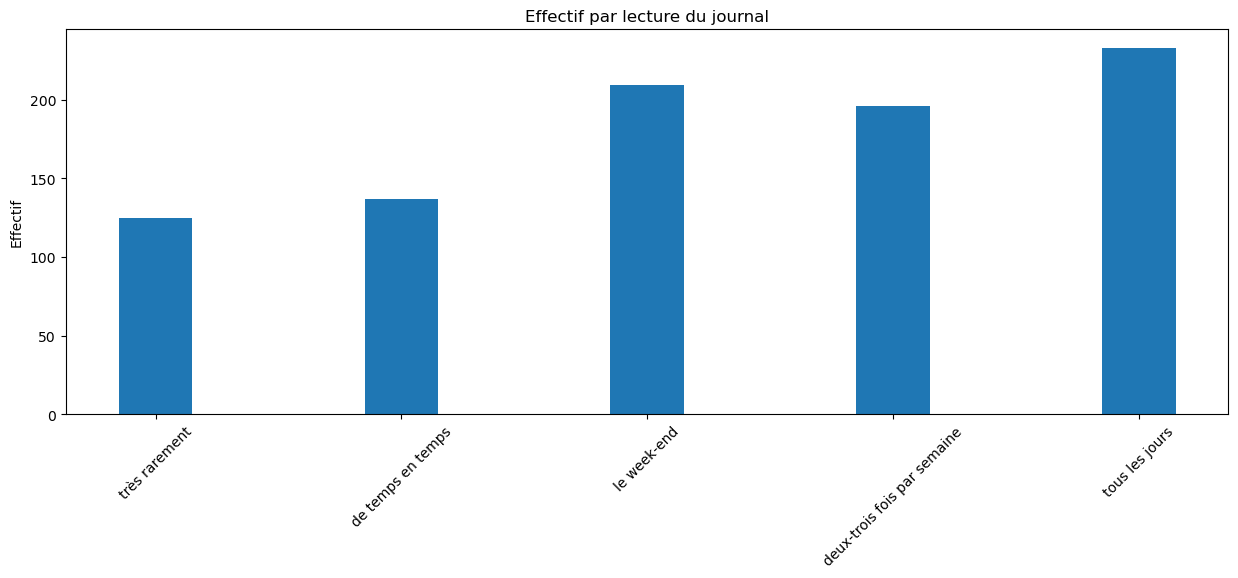

In [154]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal.sort_values('code_lecture')['lecture']]
eff = [l for l in df_lecture_journal.sort_values('code_lecture')['effectif']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par lecture du journal')
plt.gcf().set_size_inches(15, 5)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [119]:
lect_jour = df_lecture_journal[['lecture', 'frequence']]
lect_jour.set_index('lecture', inplace=True)
lect_jour.head()


,frequence
lecture,
très rarement,13.89
de temps en temps,15.22
le week-end,23.22
deux-trois fois par semaine,21.78
tous les jours,25.89


<Axes: xlabel='lecture'>

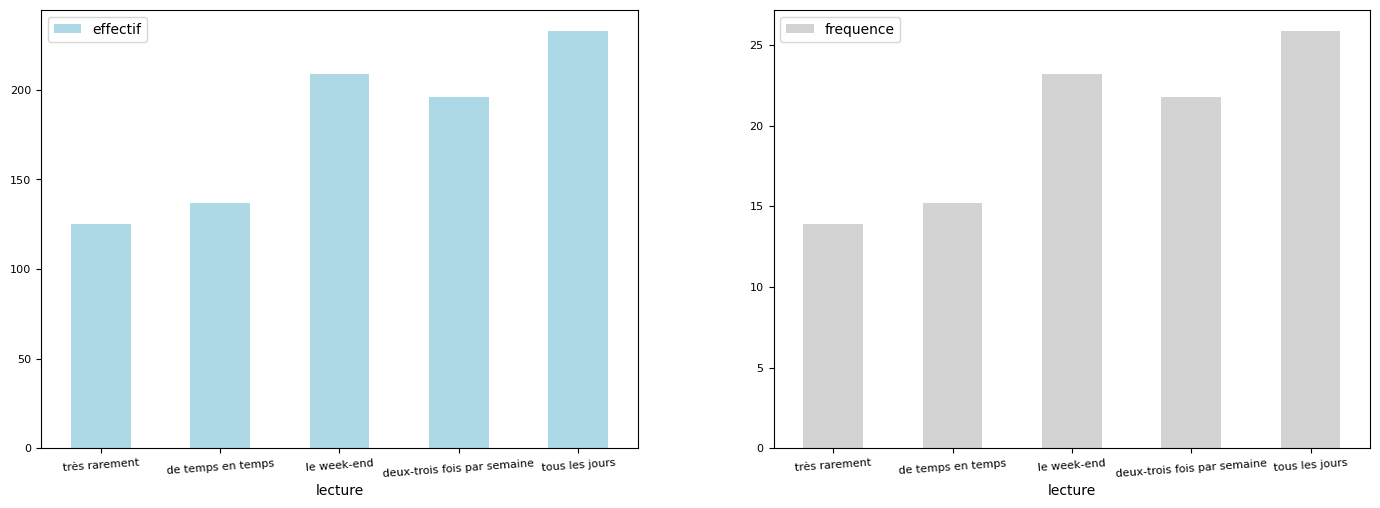

In [152]:
### Colormaps
# http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

fig, axs = plt.subplots(1,2)
fig.tight_layout()

df_lecture_journal.plot(kind='bar', x='lecture', y='effectif',ax=axs[0], 
                        figsize=(15,5), color='lightblue',rot=4, fontsize=8)
df_lecture_journal.plot(kind='bar', x='lecture', y='frequence',ax=axs[1], 
                        figsize=(15,5), color='lightgrey', rot=4, fontsize=8)


<Axes: ylabel='frequence'>

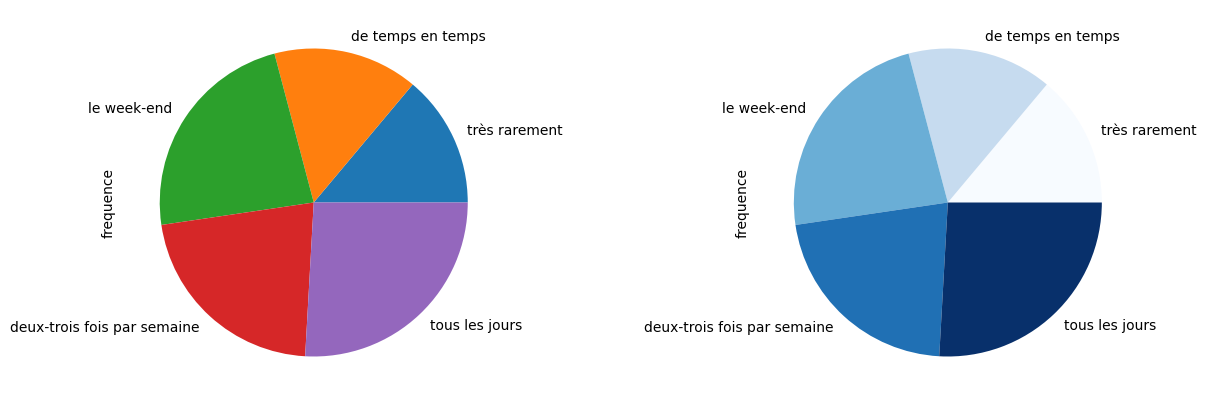

In [99]:
### Colormaps
# http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

fig, axs = plt.subplots(1,2)

lect_jour.plot(kind='pie', y='frequence',ax=axs[0], figsize=(15,5), legend=False)

### A préferer: une seule couleur, car différente intensité du même phénomène
lect_jour.plot(kind='pie', y='frequence',ax=axs[1], colormap='Blues', figsize=(15,5), legend=False)


In [100]:
ljt = lect_jour.T
ljt

lecture,très rarement,de temps en temps,le week-end,deux-trois fois par semaine,tous les jours
frequence,13.89,15.22,23.22,21.78,25.89


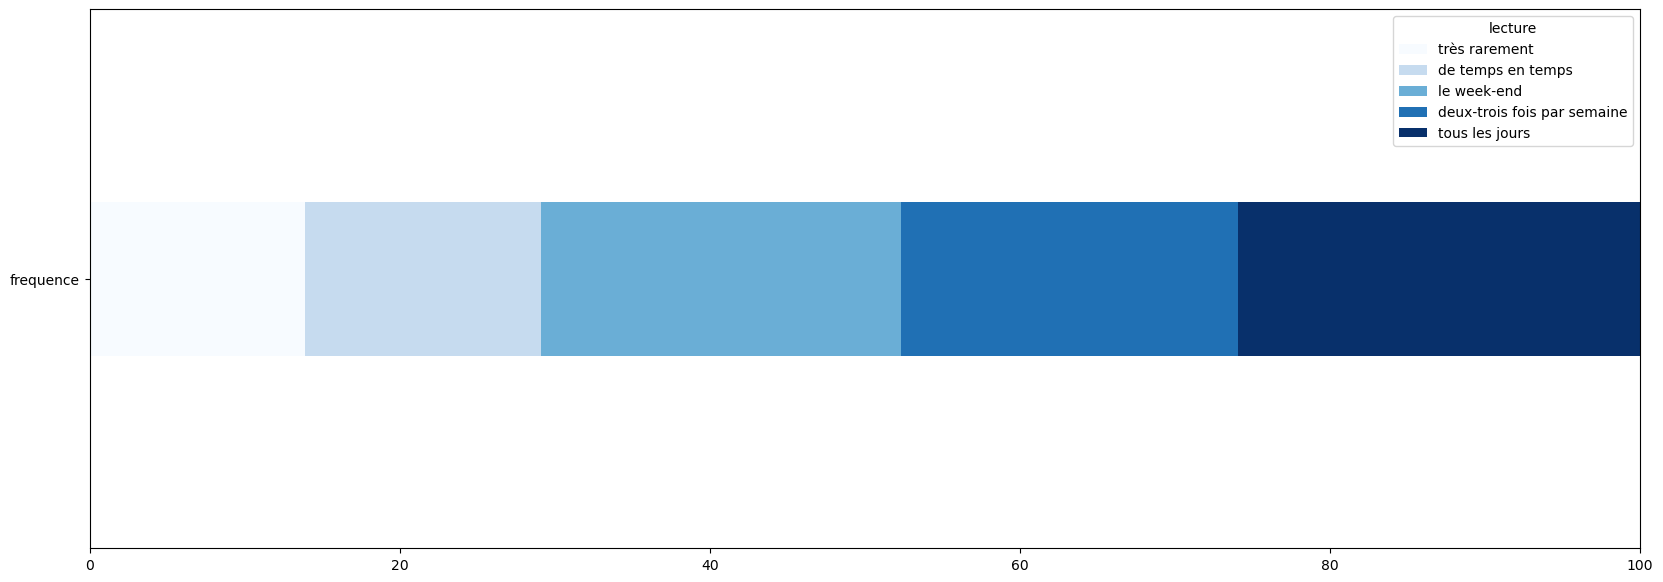

In [117]:
### Pandas plot reference
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
## Barplots
# https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

fig = aljt.plot(kind='barh', stacked=True, figsize=(20,7), colormap='Blues', width=0.2, xlim=[0,100])

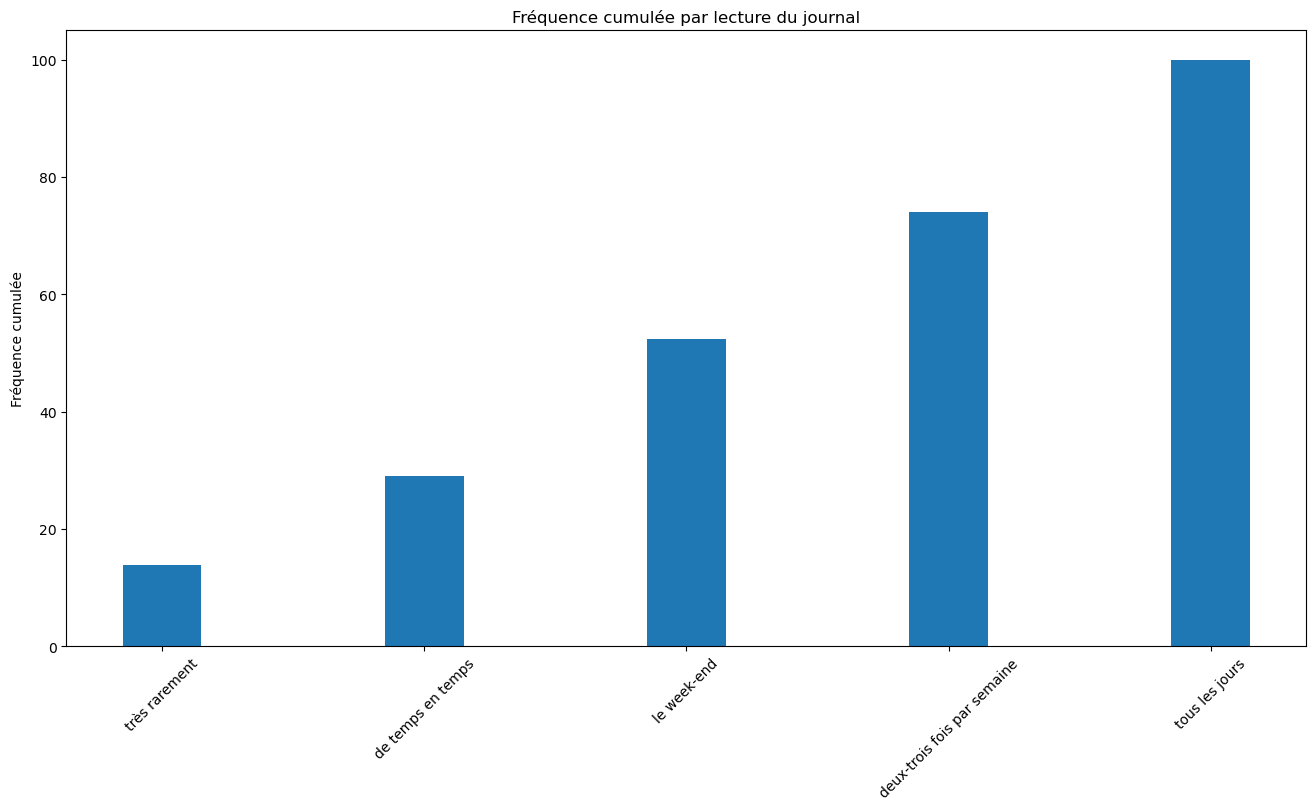

In [28]:
# Distribution par lecture journal: fréquence cumulée

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


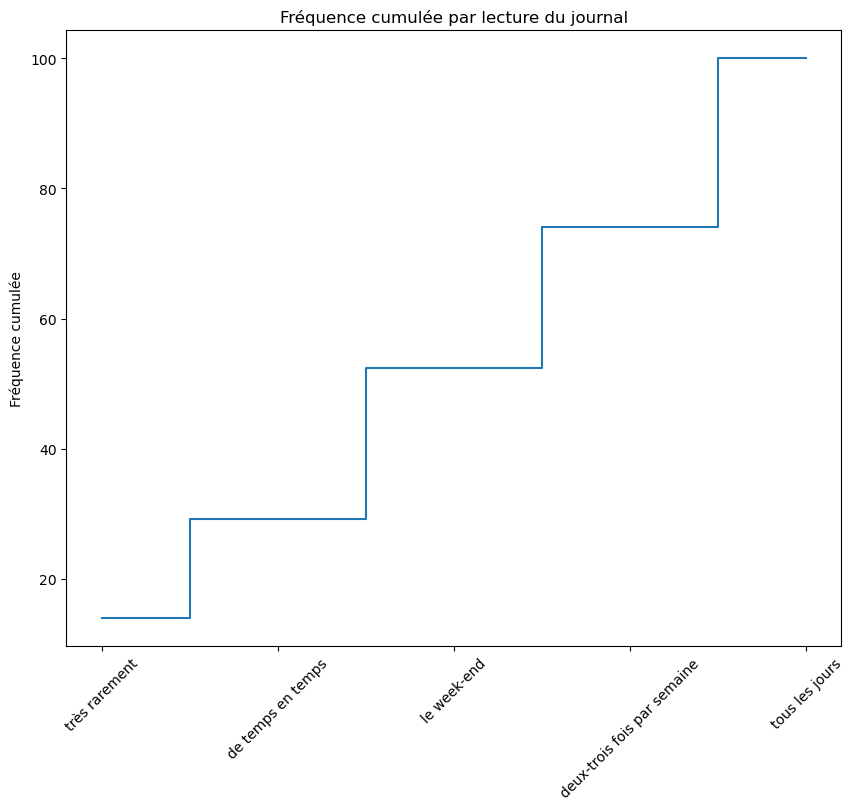

In [29]:
### Distribution par lecture journal: fréquence cumulée
# Diagramme par paliers plus lisible

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.plot(objects, eff, drawstyle='steps-mid') # autre valeur: steps-post, steps

plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(10, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [32]:
###  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
obs['lecture_journal_codes'] = obs['lecture_journal']\
    .replace(['très rarement','de temps en temps','le week-end',
              'deux-trois fois par semaine','tous les jours'],[1,2,3,4,5])
obs.head()

,age,n_foyer,lecture_journal,parti,lecture_journal_codes
id,,,,,
1,87,7,deux-trois fois par semaine,populiste,4
2,31,4,de temps en temps,gauche,2
3,79,5,deux-trois fois par semaine,populiste,4
4,36,3,le week-end,écologiste,3
5,75,4,deux-trois fois par semaine,gauche,4


(1.0, 5.0)

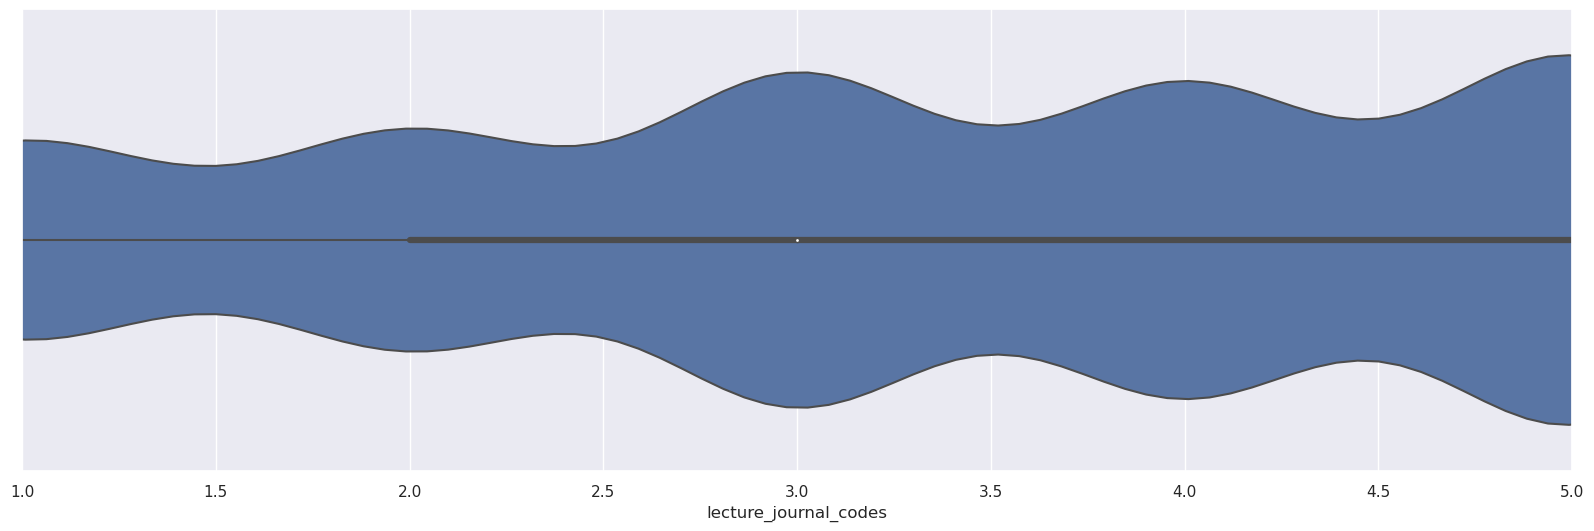

In [33]:
### Ce violin plot n'a pas beaucoup de sens et en doit pas être utilisé ! 
#  car les densitées des points intermédiaires (qui n'existent pas) sont trompeuses
# Adapté pour les variables continues, le violin plot ne l'est pas pour les 
# variables ordonnées comme dans le cas présent

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 6)})

l = obs["lecture_journal_codes"]

ax = sns.violinplot(x=l)
ax.set_xlim(left=min(l), right=max(l))

